In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread("cup.jpg")
image.shape

(480, 640, 3)

In [3]:
# create Selective Search Segmentation Object using default parameters
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
 
# set input image on which we will run segmentation
ss.setBaseImage(image)

# Switch to fast but low recall Selective Search method
ss.switchToSelectiveSearchFast()
# Switch to high recall but slow Selective Search method
#ss.switchToSelectiveSearchQuality()

# run selective search segmentation on input image
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

Total Number of Region Proposals: 1605


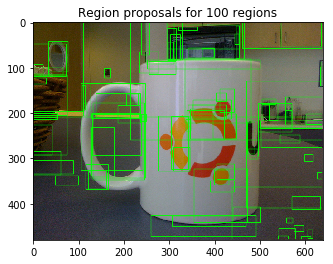

In [4]:
# number of region proposals to show
numShowRects = 100
# increment to increase/decrease total number
# of reason proposals to be shown
increment = 50

# create a copy of original image
imOut = image.copy()

# itereate over all the region proposals
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < numShowRects):
        x, y, w, h = rect
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    else:
        break

RGB_image = cv2.cvtColor(imOut, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_image) # expect true color
plt.title('Region proposals for {} regions'.format(numShowRects))
plt.show()
